<h1><center>Laboratorio 10: Interpretabilidad 🤖</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesor: Pablo Badilla y Ignacio Meza D.
- Auxiliar: Sebastián Tinoco
- Ayudante: Felipe Arias y Diego Cortez

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Fran Zautzik
- Nombre de alumno 2:


### **Link de repositorio de GitHub:** `https://github.com/bacchus00/laboratorio-mds`

### Indice

1. [Temas a tratar](#Temas-a-tratar:)
3. [Descripcción del laboratorio](#Descripción-del-laboratorio.)
4. [Desarrollo](#Desarrollo)

## Temas a tratar

- Clasificación usando `XGBoost`.
- Métodos Agnósticos Globales de Interpretabilidad (`Partial Dependence Plot`, `Permutation Feature Importance`)
- Métodos Agnósticos Locales de Interpretabilidad (`Scoped Rules`, `SHAP`)

## Reglas:

- **Grupos de 2 personas**
- Asistencia **obligatoria** a instrucciones del lab (viernes 16.15). Luego, pueden quedarse trabajando en las salas o irse.
- **No se revisarán entregas de personas ausentes**.
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias.
- Pueden usar cualquer matrial del curso que estimen conveniente.

### Objetivos principales del laboratorio

- Generar un pipeline de clasificación con `XGBoost`.
- Implementar modelos de interpretabilidad para explicar el funcionamiento del modelo de clasificación.

El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `pandas`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre DataFrames.

# 1. Problemas Clínicos del Dr. Simi

<p align="center">
  <img src="https://gantz.cl/wp-content/uploads/2020/01/79024136_2718114448239059_7240913062570491904_o.jpg" width="350">
</p>

El reconocido **Dr. Simi**, famoso vendedor de medicamentos en latinoamerica, debido a la creciente prevalencia de enfermedades crónicas, como la diabetes, decidió abrir una clínica especializada en el tratamiento de esta enfermedad en nuestro país.

La clínica del Doctor Simi se convirtió en un lugar donde los pacientes con diabetes podrían recibir atención médica integral. El personal médico estaba compuesto por especialistas en endocrinología, nutrición y enfermería, todos capacitados en el manejo de la diabetes.

Sin embargo él se ha dado cuenta que los tiempos han cambiado y gracias a las tecnologías es posible generar mejores predicciones en la diabetes conociendo el historial médico de las personas. Por esto, el doctor se ha colocado una meta de incluir modelos de machine learning dentro de sus clínicas, para ello le ha solicitado crear un modelo capaz de predecir/clasificar diabetes pero le rogó que el desarrollo del modelo tuviera un especial enfoque en la interpretabilidad de lo que hace su modelo.

Para que usted pueda entrenar el modelo, Dr. Simi le ha entregado un dataset de todos los clientes que fueron detectados con diabetes a lo largo de la historia de la clinica. Con ello, adjunta el historial médico de las personas en forma de datos tabulares para que usted pueda realizar fácilmente la clasificación.


In [2]:
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = '/content/drive/MyDrive/Bushe/Laboratorio/Lab10/'
except:
    print('Ignorando conexión drive-colab')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd

df = pd.read_csv(path+'diabetes_data.csv.zip')
df.head(4)

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0


## 2. Clasificación de pacientes con diabetes (0.5 pt)

<p align="center">
  <img src="https://media.tenor.com/QH--g3ZaSbsAAAAC/dr-simi-abrazo.gif" width="400">
</p>

En primer lugar, el reconocido doctor le pide entrenar un modelo de `XGBoost` utilizando como target la columna `Diabetes` del dataset `diabetes_data.csv`. Para el entrenamiento tome en cuenta **todos** los pasos necesarios para entrenar un modelo de aprendizaje supervisado vistos hasta la fecha (use `Pipeline`, `ColumnTransformer`, etc.), comente sus decisiones y los resultados obtenidos con el modelo. ¿Es acaso un buen predictor de diabetes?, ¿Qué buscan explicar las métricas utilizadas?, ¿las métricas utilizadas para medir la predictibilidad le permiten asegurar que su modelo una buena elección de las features?.

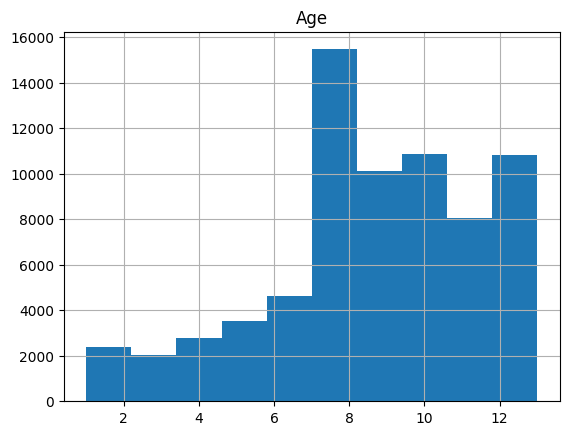

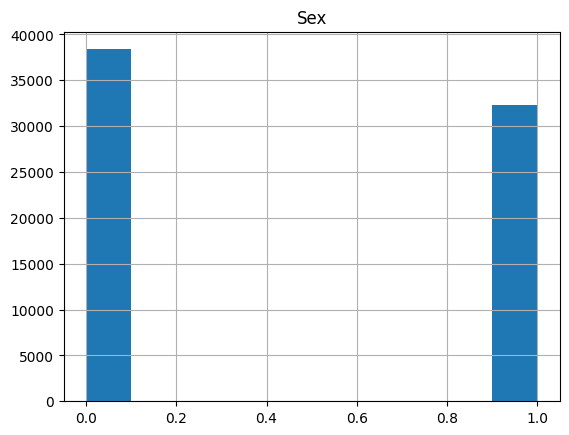

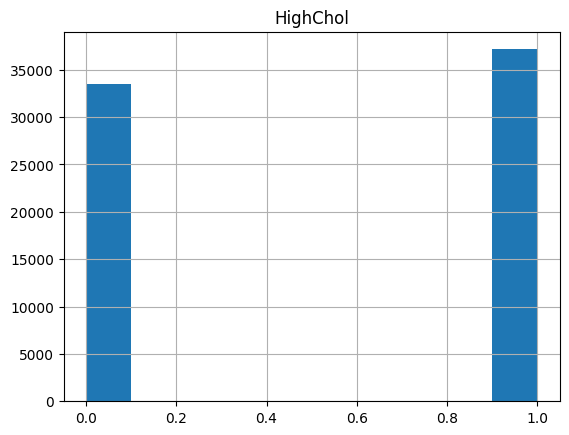

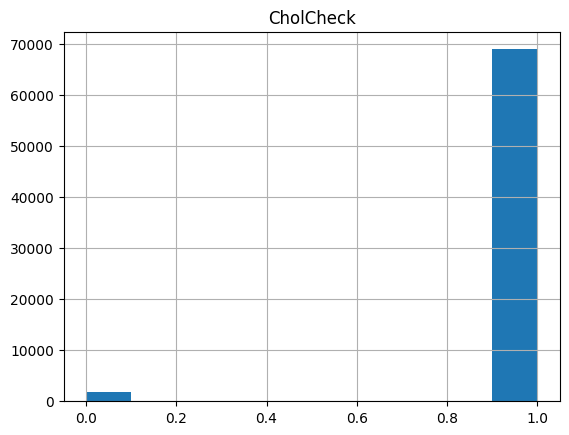

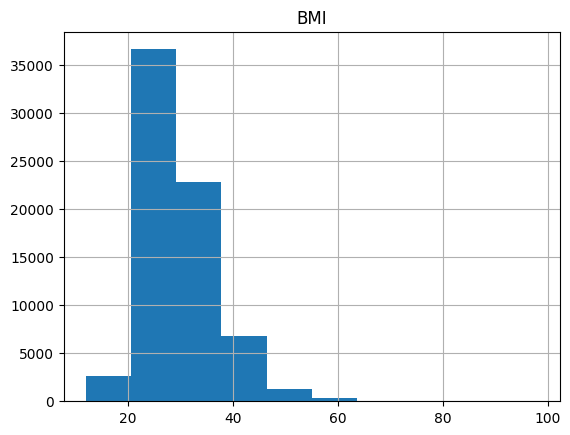

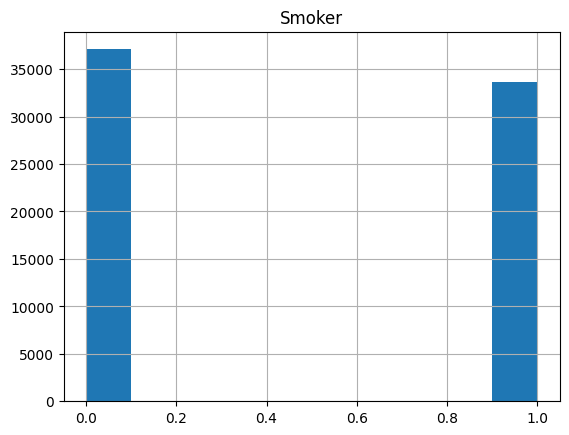

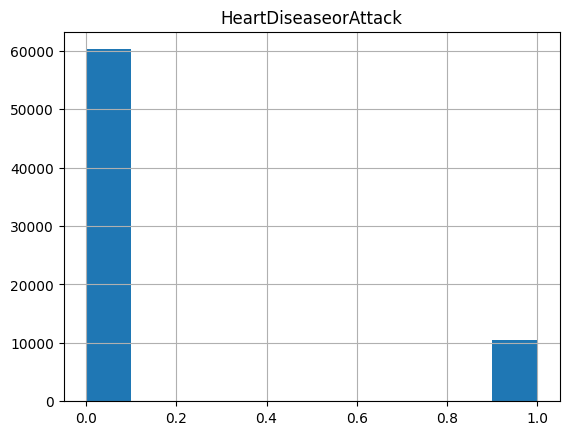

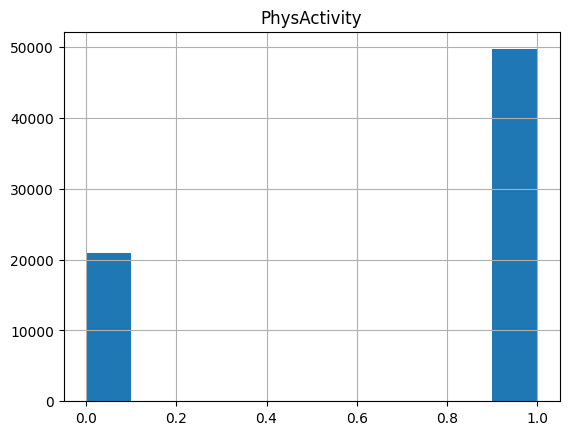

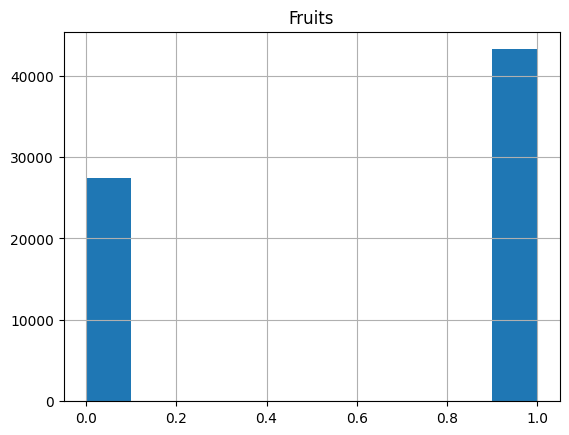

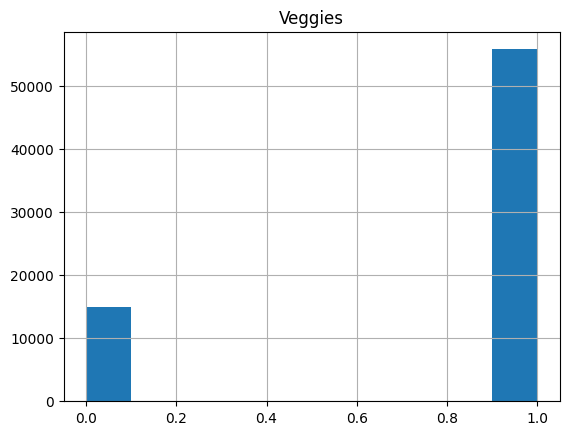

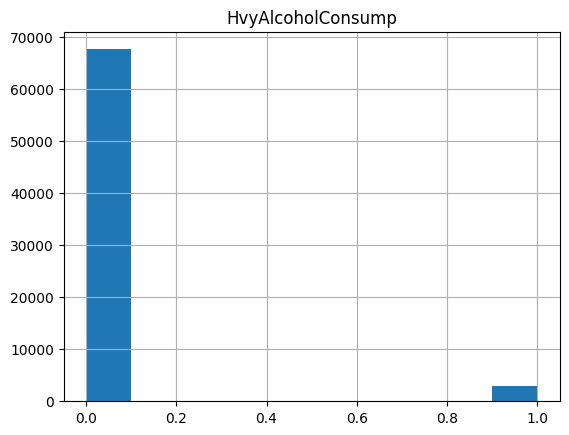

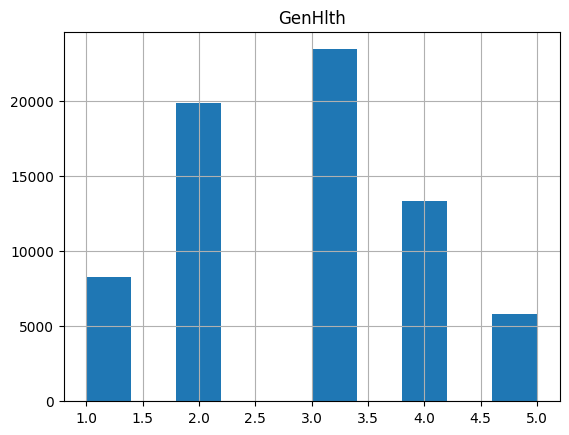

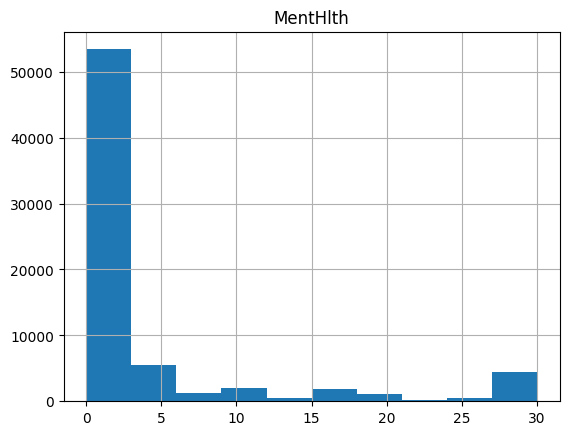

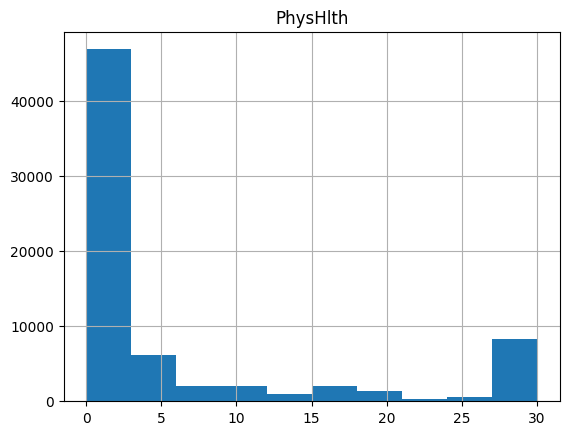

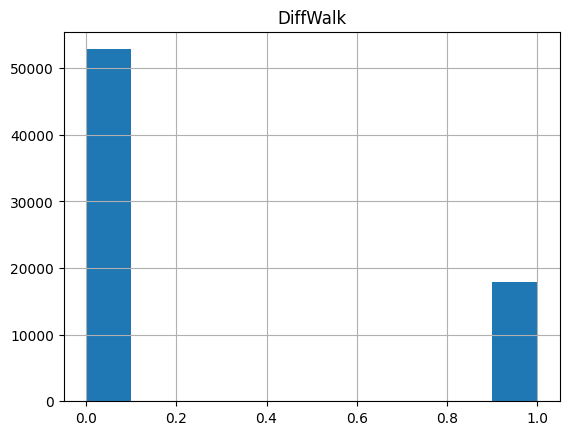

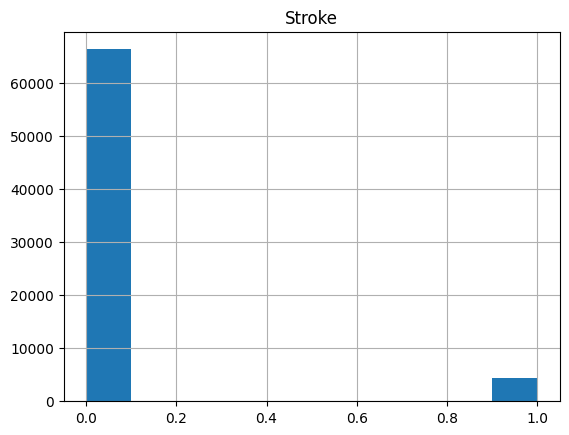

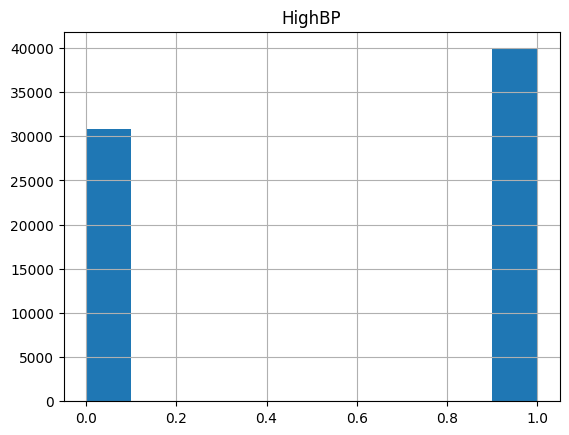

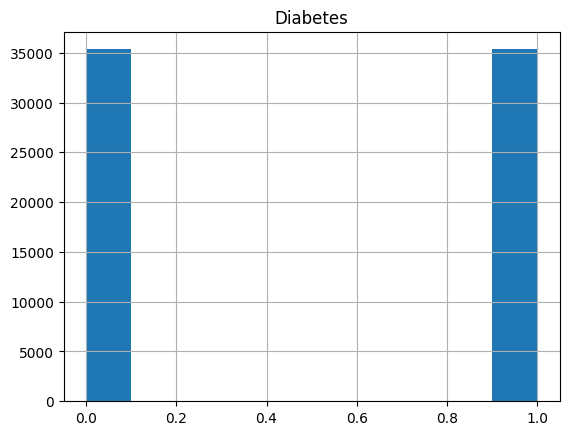

In [ ]:
import matplotlib.pyplot as plt
for col in df:
  df[col].hist()
  plt.title(col)
  plt.show()


De los graficos anteriores se obtiene que:

Son variables numericas

* Age
* BMI
* MentHlth
* PhysHlth
* GenHlth

Y que GenHlth y BMI parecen tener una distribucion cuasi normal.

Mientras que las demas son variables categoricas nominales Binarias

In [ ]:
!pip install xgboost

In [4]:
from tables.atom import Float16Atom
import xgboost as xgb
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

var_num_norm = ['BMI', 'GenHlth']
var_num_unk = ['Age', 'MentHlth', 'PhysHlth']

std_scaler = ('std_scaler', StandardScaler(), var_num_norm)
min_max_scaler = ('min_max_scaler', MinMaxScaler(), var_num_unk)

col_trans = ColumnTransformer([std_scaler, min_max_scaler], remainder='passthrough')

clf = xgb.XGBClassifier()

pipeline = Pipeline(
    steps=[
        ('transformaciones', col_trans),
        ('clf', clf)
    ]
)

x_vars = list(df.columns)
x_vars.remove('Diabetes')

X = df[x_vars]
y = df['Diabetes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
print("Matriz de confusión\n\n", confusion_matrix(y_test, y_pred), "\n")
print(classification_report(y_test, y_pred))

Matriz de confusión

 [[8173 3488]
 [2429 9239]] 

              precision    recall  f1-score   support

         0.0       0.77      0.70      0.73     11661
         1.0       0.73      0.79      0.76     11668

    accuracy                           0.75     23329
   macro avg       0.75      0.75      0.75     23329
weighted avg       0.75      0.75      0.75     23329



Observando el resultado de las metricas es posible ver que el modelo tiene un poder predictivo aceptable. Puede verse que el f1-score macro, correspondiente a la media harmonica entre el precision y recall, es de 0.75 (y bastante parecido para ambas clases por separado). Pese a que haya un buen poder predictivo esto no nos asegura que las caracteristicas estimadas como las relevantes para la clasificacion sean las verdaderamente mas relevantes para el problema en el mundo real.

## 3. Importancia de las features con XGBoost (0.5 pt)

<p align="center">
  <img src="https://media.tenor.com/5JAj5_IiagEAAAAd/dr-simi-dr-simi-dance.gif" width="400">
</p>

Para añadir el toque de interpretabilidad que Dr. Simi le pide, se le pide calcular la **importancia de las features** del modelo entrenado utilizando todos los métodos (*weight*, *cover*, *gain*) que posee xgboost usando `plot_importance`. ¿Los resultados obtenidos con los diferentes métodos son compatibles?, comente sus resultados y a que se debe la igualdad o desigualdad que ve en los resultados. Finalmente, ¿las importancias obtenidas son suficientes para obtener la interpretabilidad de un modelo que utiliza árboles? ¿Qué debilidad presenta este método?

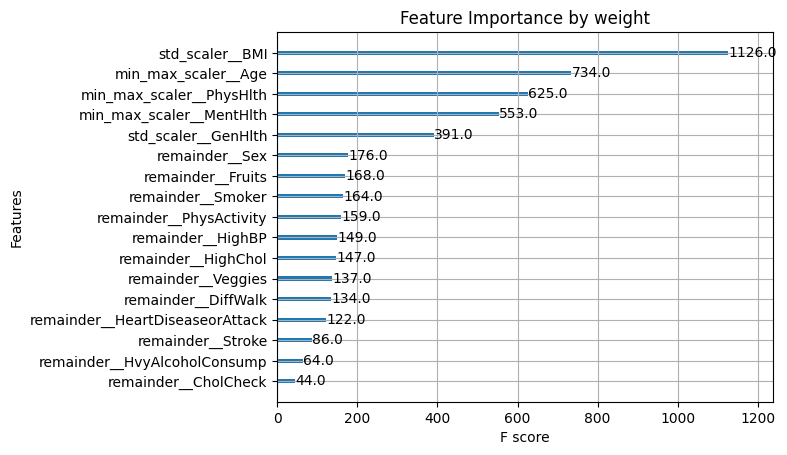

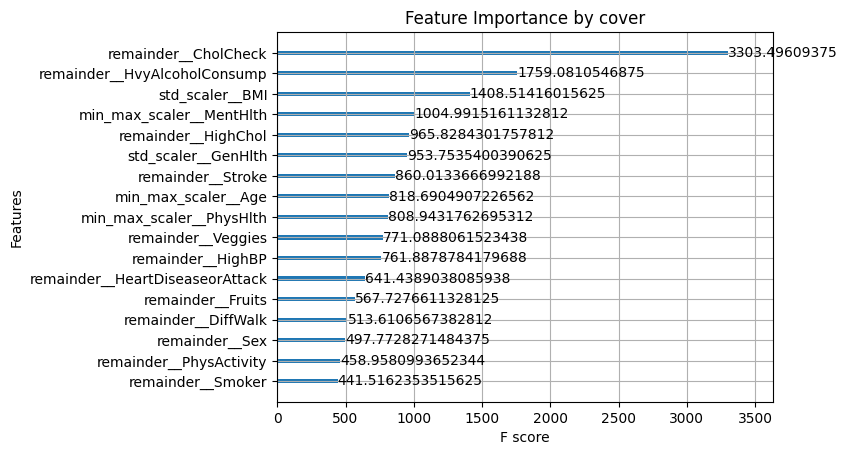

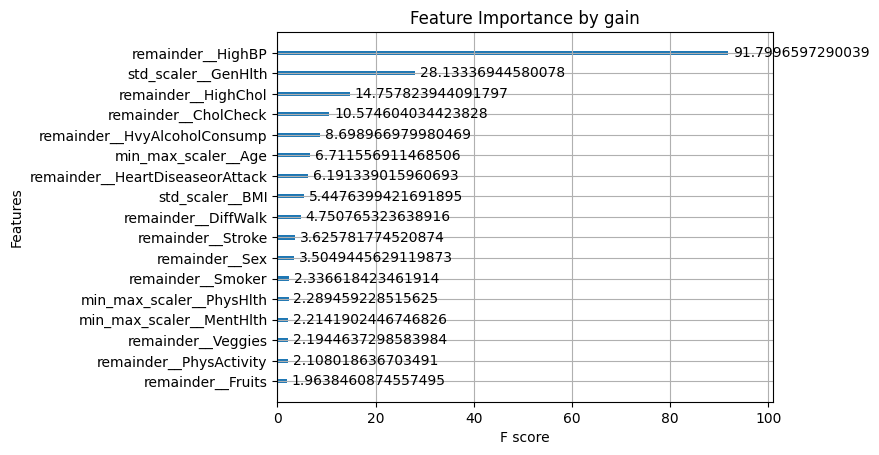

In [ ]:
from xgboost.plotting import plot_importance
# Inserte su código aquí

feature_names = list(col_trans.get_feature_names_out())
clf.get_booster().feature_names = feature_names

plot_importance(clf, importance_type='weight', title="Feature Importance by weight")
plt.show()
plot_importance(clf, importance_type='cover', title="Feature Importance by cover")
plt.show()
plot_importance(clf, importance_type='gain', title="Feature Importance by gain")
plt.show()

Puede observarse que para los distintos metodos para obtener la importancia de las features el orden de importancia es bastante variable, sin embargo hay cosas que se mantienen en una posicion relativamente altas como el BMI, Age, GenHlth. La diferencia se debe a como estan definidos los metodos para clacular la importancia, donde weight corresponde a el numero de veces que aparece una feature en unarbol, gain es la ganancia promedio de accuracy de utilizar una feature para hacer una particion y cover es el promedio de observaciones para las que se ocupa la feature para decidir su clase. Estos valores no son suficientes para entender las decisiones del modelo puesto que el modelo es mas complejo que un poderacion de sus features.

## 4. Métodos Agnósticos Globales (1 pt)

<p align="center">
  <img src="https://media.tenor.com/JcRHtjVuXN8AAAAC/dr-simi-farmacias-similares.gif" width="400">
</p>

Para mitigar los problemas encontrados en la sección anterior, Dr. Simi le pide implementar un **método de permutación** que le permita observar la importancia de las features. Visualice los resultados de este método en un gráfico. Para que su modelo sea consistente, repita el proceso **30 veces** y verifique la desviación estándar de sus resultados (¿Qué señala está?). Además, responda las siguientes preguntas:


- ¿Cómo mide la importancia de las features su propuesta?
- ¿Qué features tienen un mayor impacto en la salida del modelo?. Comente las 5 primeras, ¿Tienen sentido?
- ¿Cómo cambian sus conclusiones con respecto a las features importances del punto anterior?
- Nombre y explique 3 ventajas y 3 desventajas del método implementado.

In [ ]:
# Inserte su código aquí
from sklearn.inspection import permutation_importance

result = permutation_importance(pipeline, X_test, y_test, n_repeats=30, random_state=0)
perm_sorted_idx = result.importances_mean.argsort()

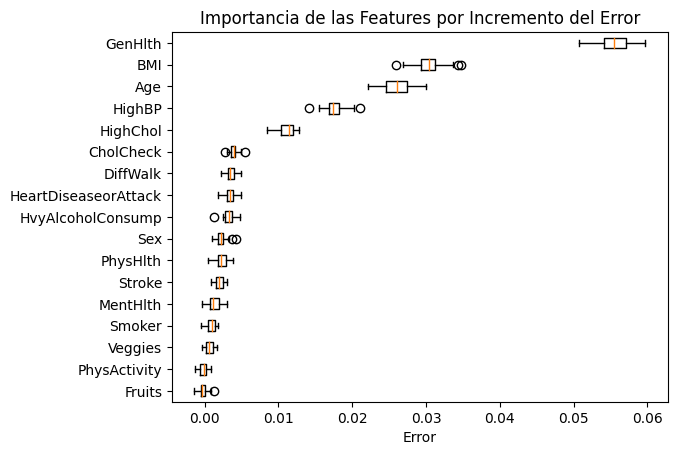

In [ ]:
plt.boxplot(
    result.importances[perm_sorted_idx].T,
    vert=False,
    labels=np.array(X.columns)[perm_sorted_idx],
)
plt.title("Importancia de las Features por Incremento del Error")
plt.xlabel('Error')
plt.show()

Lo que hace este metodo para calcular la importancia es ver cual es el efecto en el error de prediccion del modelo de que los valores en una variable de los datos se permute aleatoriamente.

Puede verse que las variables con mayor impacto en el error son GenHlth, BMI, Age, HighBP y HighChol, cosa que es coherente con los resultados anteriores pues estos valores tendian a aparecer mas arriba en la lista de importancia en los graficos. Pese a esto igual deja en evidencia que las metricas anteriores no son suficientes para explicar que features son verdaderamente relevantes para que el modelo llegue a los buenos resultados que tiene.

Ventajas:
* Siendo un metodo agnostico puede ser ocupado con cualquier modelo (no como las metricas anteriores).
* Toma encuenta las interacciones entre las variables.
* No necesita que el modelo sea reentrenado.

Desventajas:
* La metrica del metodo depende del error del modelo
* Requiere tener las etiquetas de los ejemplos
* Tener features correlacionadas puede llevar a resultados engañosos



## 5. Métodos Agnósticos Locales (2 pt)

<p align="center">
  <img src="https://i.makeagif.com/media/1-27-2017/fBrzT8.mp4" width="400">
</p>

### Parte A (0.4 pt)

Alegre por saber cómo funciona el modelo de predicción a nivel general, Dr. Simi le pide ahora interpretar las predicciones de su modelo a nivel de paciente (es decir, desde un punto de vista **local**). Para esto, el ilustre farmacéutico le pide calcular los *shap values* de su modelo. ¿Qué representa cada número en su resultado? ¿Es posible atribuir un significado a la positividad/negatividad de cada valor?

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 10.0 MB/s eta 0:00:00


In [ ]:
import warnings
warnings.filterwarnings("ignore", message=".*The 'nopython' keyword.*")

In [ ]:
# Inserte código para calcular shapley values aquí
import shap
explainer = shap.TreeExplainer(clf)
shap_values = explainer(X)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [ ]:
shap_values

.values =
array([[ 2.1652341e+00,  5.9916097e-01,  4.0950453e-01, ...,
         2.2954639e-02,  2.7042639e-02,  5.3367859e-01],
       [-7.7536500e-01,  3.3436567e-01, -1.6166018e-01, ...,
         1.3157752e-01,  2.7954251e-01,  3.6064181e-01],
       [ 5.7975024e-01,  4.9667621e-01, -5.7207721e-01, ...,
         2.1802621e-01, -8.3316984e-03, -5.9759980e-01],
       ...,
       [-2.2842731e-01,  1.8837196e-01,  8.0212466e-02, ...,
        -8.9140303e-02, -3.3568789e-03,  2.2379641e-01],
       [ 7.3518306e-03,  3.2728934e-01, -2.9882458e-01, ...,
        -1.4586821e-01, -1.2831119e-02,  3.2317549e-01],
       [ 4.7035587e-01,  2.4404277e-01, -2.1379612e-01, ...,
         8.4406294e-02, -6.8852416e-04,  3.0042160e-01]], dtype=float32)

.base_values =
array([-0.00694654, -0.00694654, -0.00694654, ..., -0.00694654,
       -0.00694654, -0.00694654], dtype=float32)

.data =
array([[ 4.,  1.,  0., ...,  0.,  0.,  1.],
       [12.,  1.,  1., ...,  0.,  1.,  1.],
       [13.,  1.,  0., ..., 

Cada valor representa la contribucion de una caracteristica a la prediccion de un ejemplo como miembro de una de las dos clases. Los valores positivos indican que el valor de esta caracteristica aporto a que se predijiera el ejemplo como parte de la clase positiva y los valores negativos indican que esta caracteristica aporto a que el modelo predijiera el al ejemplo como parte de la clase negativa.

### Parte B (0.4 pt)

Usando los *shap values* calculados, grafique el **aporte** de las diferentes variables para las instancias **1**, **9** y **150**, interprete sus resultados y responda:
- ¿Qué variables afectan de manera positiva/negativa a la probabilidad de poseer diabetes?
- ¿Existe algún patrón común entre las instancias analizadas?
- ¿Es posible generalizar estas conclusiones a todo el dataset?

In [ ]:
shap.initjs()

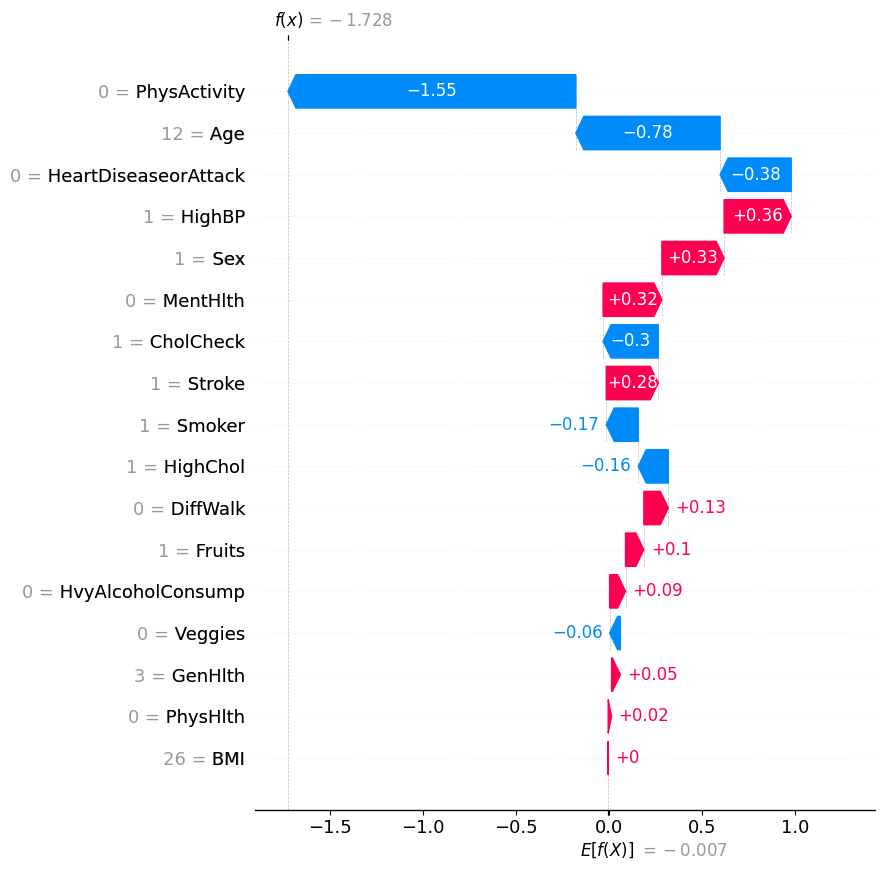

In [ ]:
idx = 1

shap.plots.waterfall(shap_values[idx,:],
                     max_display=18)

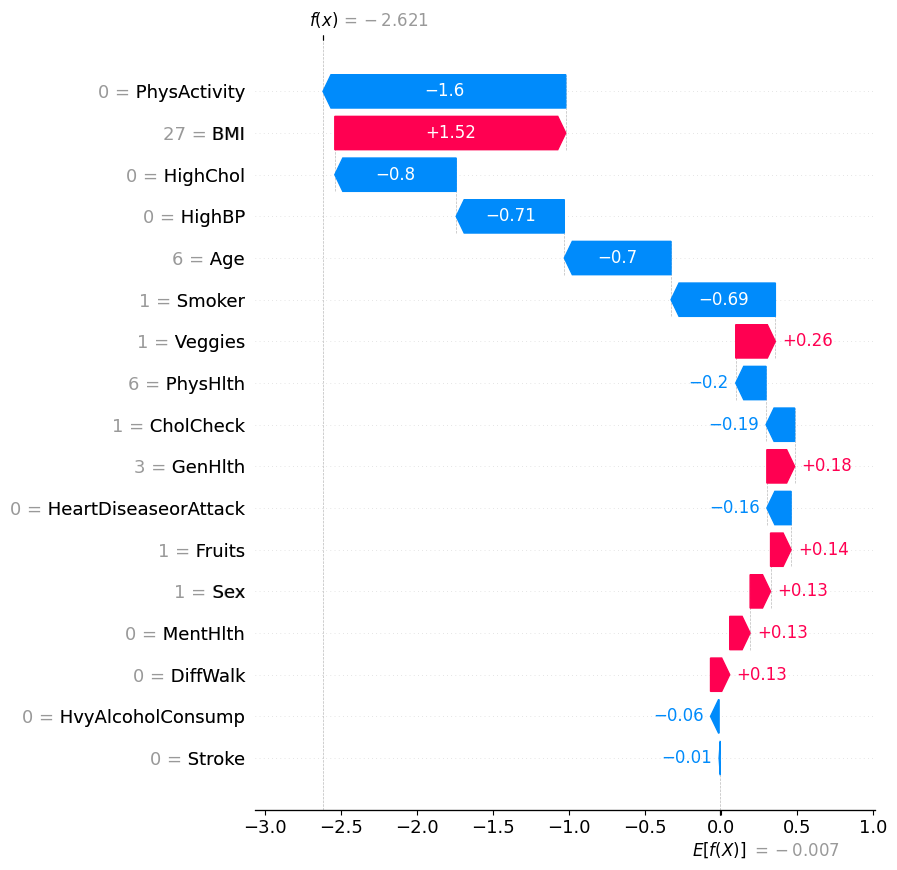

In [ ]:
idx = 9

shap.plots.waterfall(shap_values[idx,:],
                     max_display=18)

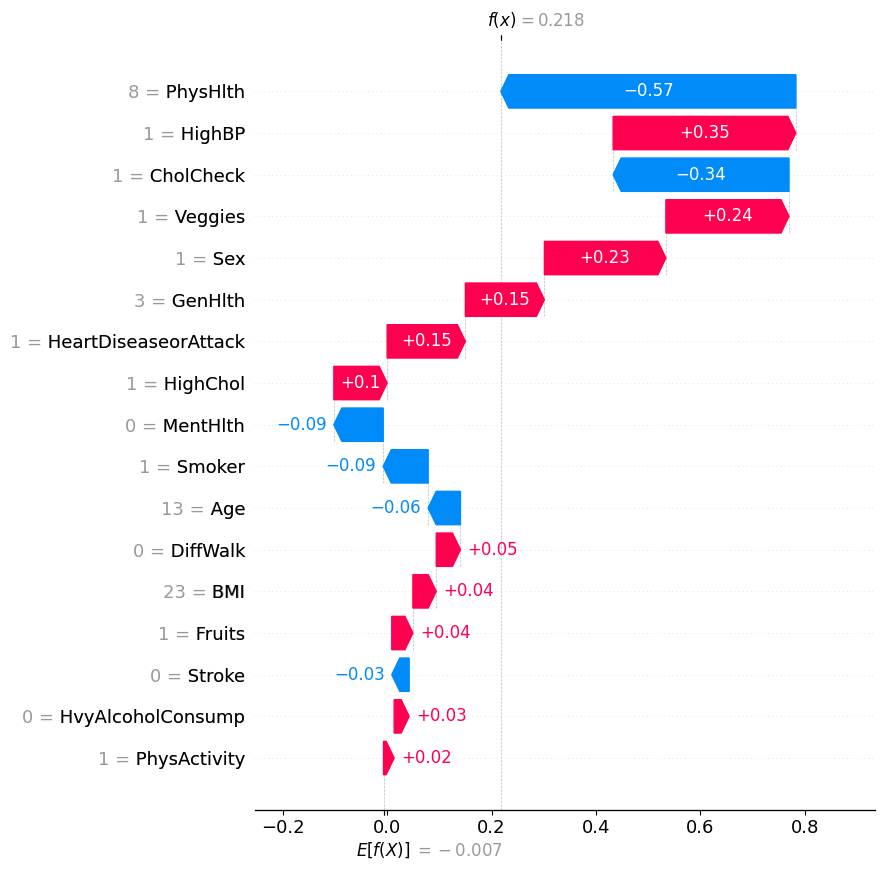

In [ ]:
idx = 150

shap.plots.waterfall(shap_values[idx,:],
                     max_display=18)

Observando las visualizaciones, en el centro de las figuras podemos ver las caracterisitcas y sus valores que mas aportaron a que la prediccion tendiera a ser de clase positiva o negativa. Se puede ver que las caracteristicas que aparecen en el top 5 con mayor magnitud mas de una vez son HighBP, Age, Sex, PhysActivity. Solo con estos 3 ejemplos es imposible poder generalizar para todo el dataset, sobretodo considerando que entre estros 3 ejemplos igual hay harta variablidad.

### Parte C (0.4 pt)

Genere ahora una visualización donde se grafique el aporte de cada feature a nivel **global** e interprete sus resultados. ¿Qué diferencias existen con las conclusiones generadas a nivel de instancia?

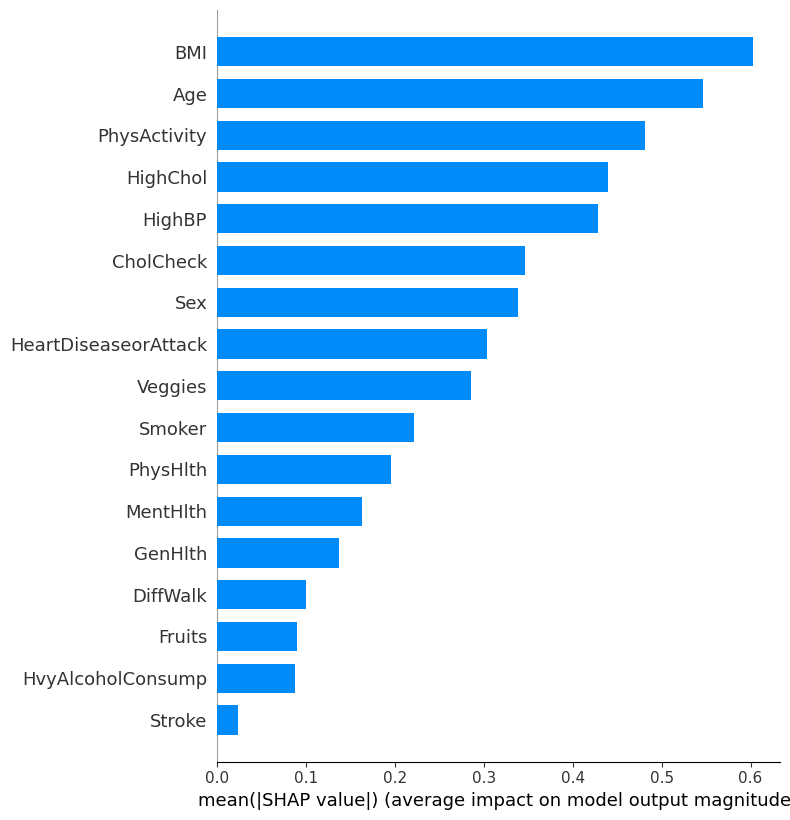

In [ ]:
# Inserte código para generar gráficos de aporte global aquí
shap.summary_plot(shap_values, X, plot_type="bar")

Puede verse que a nivel global si aparecen Age, HighBP Y PhysActivity entre las caracteristicas mas relevantes como en los casos anteriores, sin embargo Sex queda mas abajo y en 2 de los 3 casos particulares anteriores BMI no era tan relevante pero aqui vemos que es la mas importante globalmente.

### Parte D (0.4 pt)

Grafique ahora un *scatterplot* entre los *shap values* y las primeras 5 features con mayor impacto global (un gráfico por cada feature), coloreando cada punto por la probabilidad de tener diabetes. ¿Qué puede concluir de sus resultados?

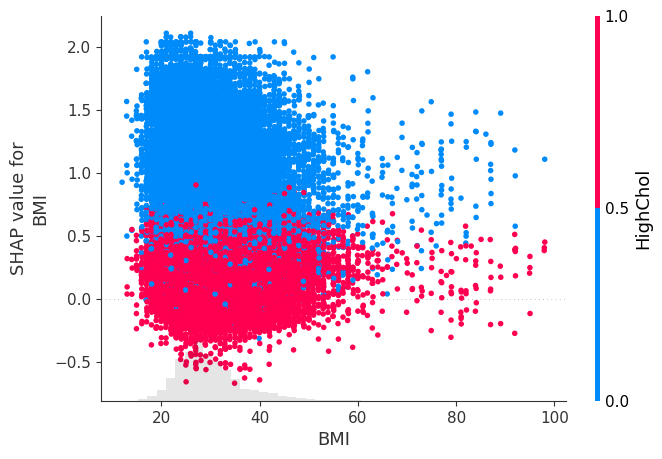

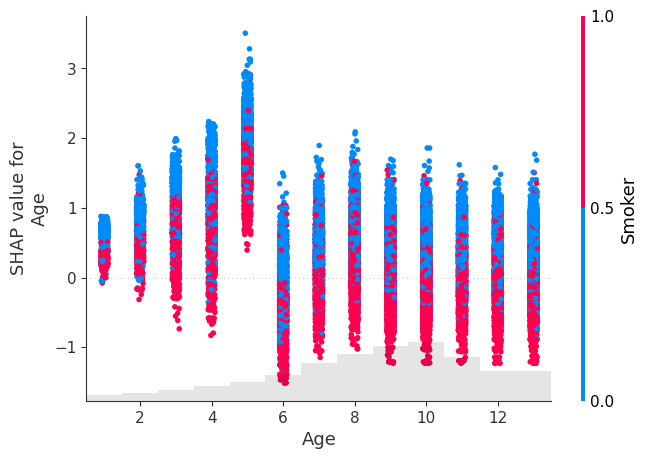

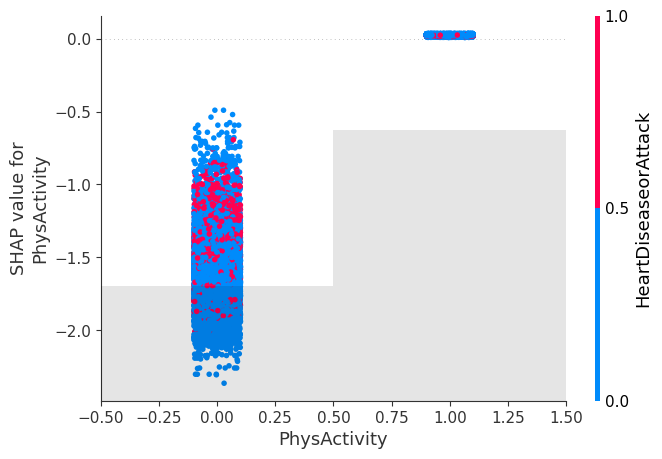

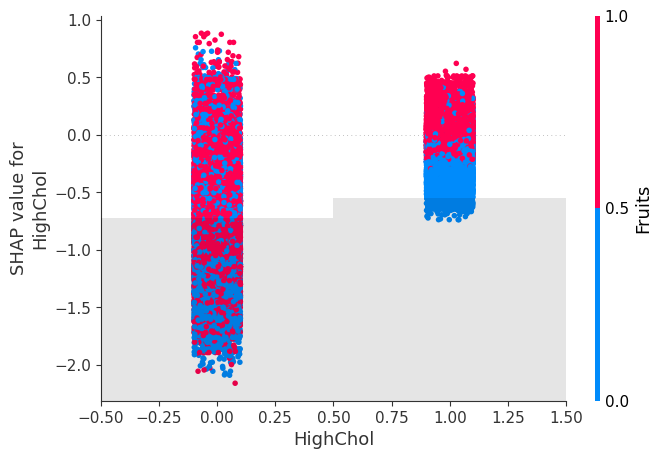

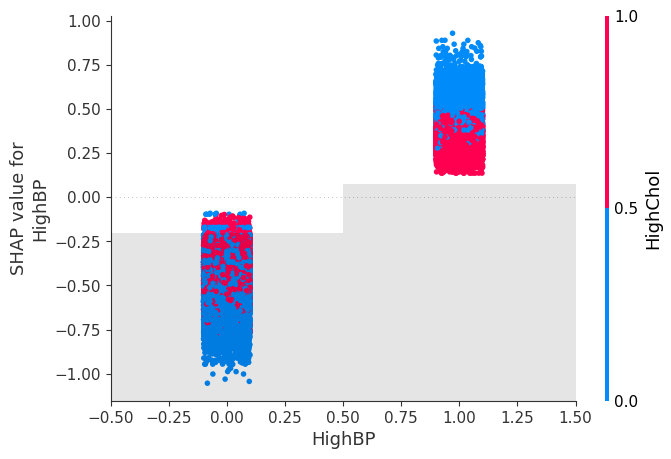

In [ ]:
# Inserte código para generar gráficos de feature vs shap value aquí
shap_values_abs = np.mean(np.abs(shap_values.values), axis=0)

feature_importance_names = X_train.columns[shap_values_abs.argsort()[::-1]]

for name in feature_importance_names[:5]:
    shap.plots.scatter(shap_values[:,name],
                   color=shap_values)

Para BMI vemos que para la mayoria de los ejemplos de clase positiva el SHAP value es menor a 0.5 aprox casi independientemente del BMI. Para Age vemos que para las distintas edades el SHAP value de la clase positiva tiende a ser menor que el de la negativa. Para PhysActivity en los casos en que vale 0 la SHAP value tienden a ser negativos y las magnitudes son dispersas mientras que cuando PhysActivity es 1 la SHAP value tiende a ser casi nula. En HighChol vemos que para valor 0 hay harta dispersion de SHAP values, mientras que para el valor 1 las SHAP values estan restringidas a un menor intervalo y cerca de cero hay un limite entre la clase positiva y negativa. En cuanto a HighBP para valores 0 la SHAP values son negativas pero para 1 las SHAP values son positivas.

### Parte E (0.4 pt)

Finalmente, se le pide generar un gráfico del tipo **Partial Dependence Plot** para las mismas 5 variables con mayor impacto global usando una submuestra de **1000 observaciones**. ¿Qué relación existe entre la salida promedio del modelo y cada feature analizada? ¿Son estas conclusiones generalizables para todo el conjunto de datos?

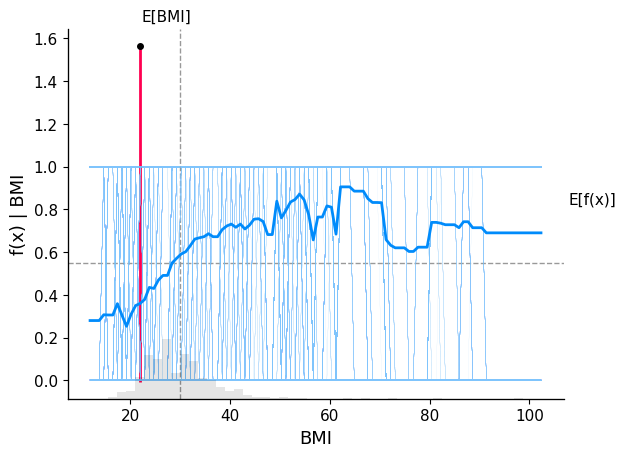

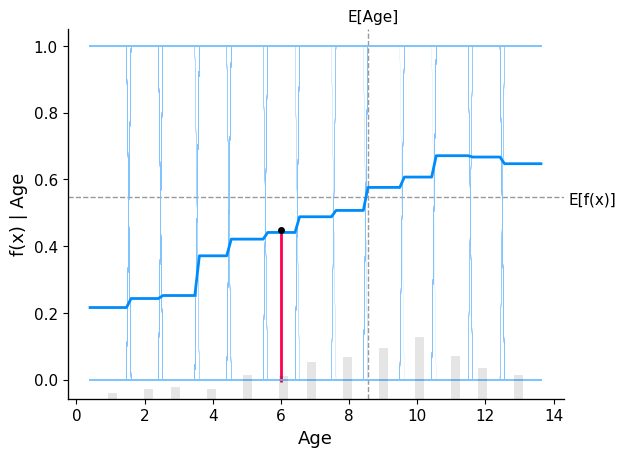

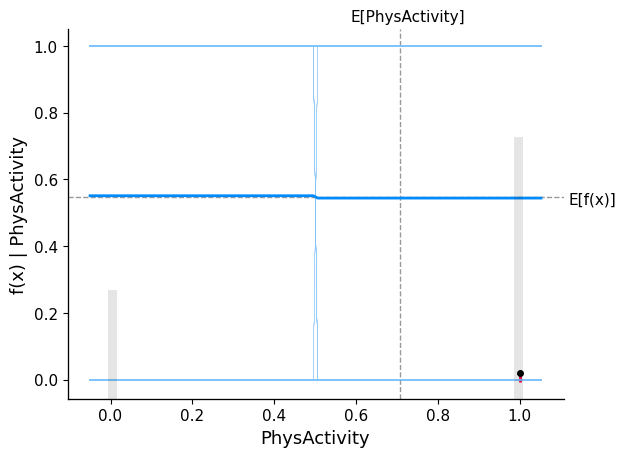

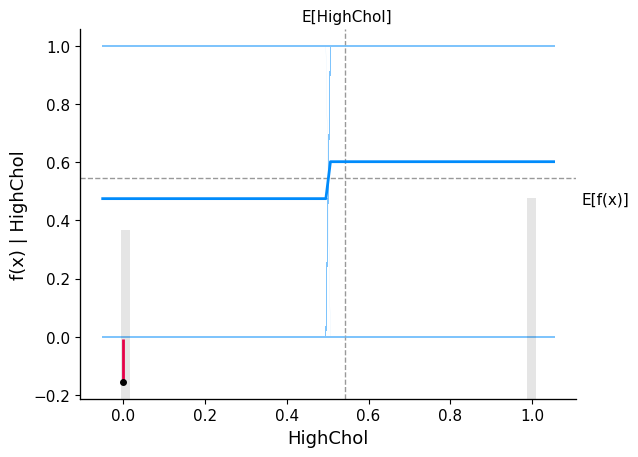

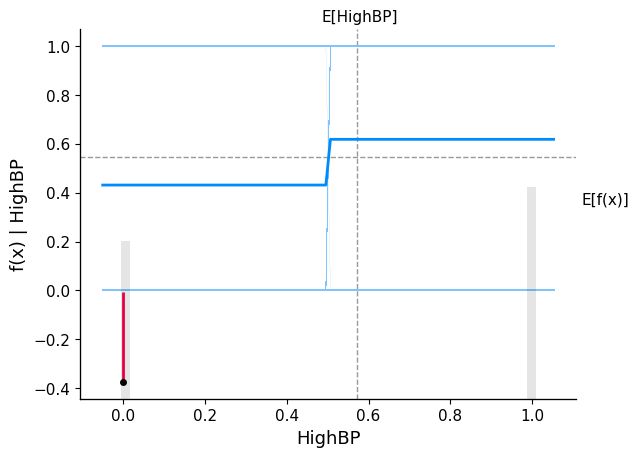

In [ ]:
# Inserte código para generar gráficos PDP aquí
X1000 = shap.utils.sample(X, 1000)

sample_ind = 20

for name in feature_importance_names[:5]:
    shap.partial_dependence_plot(
        name, pipeline.predict, X1000, model_expected_value=True,
        feature_expected_value=True, ice=True,
        shap_values=shap_values[sample_ind:sample_ind+1,:]
    )

## 6. Sistema de Reglas! (1 pt)

<p align="center">
  <img src="https://media.baamboozle.com/uploads/images/125978/1638281150_1380186_gif-url.gif" width="400">
</p>

Después de todo el trabajo hecho, Dr. Simi le pide simplificar el funcionamiento de su modelo en un sistema de reglas que le permita explicar a sus clientes las predicciones que genera su modelo. En particular, Dr. Simi le pide explicar la decisión tomada para las observaciones **1000**, **3001** y **5751**. Con las reglas propuestas señale a **cuánta población** es posible explicar con estas reglas e indique la **precisión** que poseen las reglas en la totalidad de los datos. ¿Tienen sentido sus reglas propuestas para las observaciones?. Fundamente sus respuesta señalando el impacto que tienen sus reglas sobre todo el conjunto de datos.

In [ ]:
!pip install alibi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.0/524.0 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 65.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 50.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 53.6 MB/s eta 0:00:00


In [ ]:
from alibi.explainers import AnchorTabular

In [13]:
X.iloc[1000].BMI

23.0

In [25]:
# Inserte su código para generar sistema de reglas aquí
def sistema_reglas(x, verbose=False):
  if verbose: print('Evaluando: '+str(idx))
  if x.BMI > 25:
    if verbose: print('BMI > 25')
    if x.Age > 7:
      if verbose: print('Age > 7')
      if x.HighChol == 1:
        if verbose: print('HighChol == 1')
        if x.HighBP == 1:
          if verbose: print('HighBP == 1')
          if x.PhysActivity == 0:
            if verbose: print('PhysActivity == 0')
            return 1
          else:
            if verbose: print('PhysActivity == 1')
        else:
          if verbose: print('HighBP == 0')
      else:
        if verbose: print('HighChol == 0')
    else:
      if verbose: print('Age <= 7')
  else:
    if verbose: print('BMI <= 25')
  return 0

idx = 1000
# explicar predicción idx 1000
sistema_reglas(X.iloc[idx], verbose=True)

idx = 3001
# explicar predicción idx 3001
sistema_reglas(X.iloc[idx], verbose=True)

idx = 5751
# explicar predicción idx 5751
sistema_reglas(X.iloc[idx], verbose=True)

y_pred = X.apply(sistema_reglas, axis=1)
print("Matriz de confusión\n\n", confusion_matrix(y, y_pred), "\n")
print(classification_report(y, y_pred))

Evaluando: 1000
BMI <= 25
Evaluando: 3001
BMI <= 25
Evaluando: 5751
BMI <= 25
Matriz de confusión

 [[34027  1319]
 [29672  5674]] 

              precision    recall  f1-score   support

         0.0       0.53      0.96      0.69     35346
         1.0       0.81      0.16      0.27     35346

    accuracy                           0.56     70692
   macro avg       0.67      0.56      0.48     70692
weighted avg       0.67      0.56      0.48     70692



A partir de los resultados de del sistema de regas se puede observar que no es muy efectivo teniendo un F1-score inferior a 0.5 por lo que no parece ser un reemplazo razonable para el problema, pese a que es interpretable su comportamiento.

# Retrospectiva... (1 pt)

En base a los diferentes métodos que implementa y ha comentado en este laboratorio, comente qué métodos le permiten entregar mejores conclusiones para la tarea de clasificación de diabetes. Por otro lado, ¿qué métodos son más útiles para el problema del doctor Simi, métodos agnosticos locales o globales?

La mejor estrategia para decidir cuales son las variables mas importantes es un enfoque mixto donde se ven distintas metricas y considerar las variables importantes mas repetidas en los diferentes metodos. Si doctor simi tiene como finalidad formar un sistema de reglas general es mejor enfocarse en un metodo agnostico global puesto que tiene una perspectiva mas generalizable que los locales.

# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

![Gracias Totales!](https://media.tenor.com/ctnq4bhZE3gAAAAC/drsimi-simi.gif)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>